In [50]:
import seaborn as sns
import plotnine as p9
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt

In [108]:
(bodyfat := 
 pl.read_csv('./data/bodyfat.csv')
)

shape: (252, 15)
┌─────────┬─────────┬─────┬────────┬───┬───────┬────────┬─────────┬───────┐
│ density ┆ bodyfat ┆ age ┆ weight ┆ … ┆ ankle ┆ biceps ┆ forearm ┆ wrist │
│ ---     ┆ ---     ┆ --- ┆ ---    ┆   ┆ ---   ┆ ---    ┆ ---     ┆ ---   │
│ f64     ┆ f64     ┆ i64 ┆ f64    ┆   ┆ f64   ┆ f64    ┆ f64     ┆ f64   │
╞═════════╪═════════╪═════╪════════╪═══╪═══════╪════════╪═════════╪═══════╡
│ 1.0708  ┆ 12.3    ┆ 23  ┆ 154.25 ┆ … ┆ 21.9  ┆ 32.0   ┆ 27.4    ┆ 17.1  │
│ 1.0853  ┆ 6.1     ┆ 22  ┆ 173.25 ┆ … ┆ 23.4  ┆ 30.5   ┆ 28.9    ┆ 18.2  │
│ 1.0414  ┆ 25.3    ┆ 22  ┆ 154.0  ┆ … ┆ 24.0  ┆ 28.8   ┆ 25.2    ┆ 16.6  │
│ 1.0751  ┆ 10.4    ┆ 26  ┆ 184.75 ┆ … ┆ 22.8  ┆ 32.4   ┆ 29.4    ┆ 18.2  │
│ 1.034   ┆ 28.7    ┆ 24  ┆ 184.25 ┆ … ┆ 24.0  ┆ 32.2   ┆ 27.7    ┆ 17.7  │
│ …       ┆ …       ┆ …   ┆ …      ┆ … ┆ …     ┆ …      ┆ …       ┆ …     │
│ 1.0736  ┆ 11.0    ┆ 70  ┆ 134.25 ┆ … ┆ 21.5  ┆ 25.6   ┆ 25.7    ┆ 18.5  │
│ 1.0236  ┆ 33.6    ┆ 72  ┆ 201.0  ┆ … ┆ 23.2  ┆ 35.2   ┆ 28.6    ┆ 20.1  │
│ 1.0328  ┆ 29.3    ┆ 72  ┆ 186.75 ┆ … ┆ 21.5  ┆ 31.3   ┆ 27.2    ┆ 18.0  │
│ 1.0399  ┆ 26.0    ┆ 72  ┆ 190.75 ┆ … ┆ 22.7  ┆ 30.5   ┆ 29.4    ┆ 19.8  │
│ 1.0271  ┆ 31.9    ┆ 74  ┆ 207.5  ┆ … ┆ 24.6  ┆ 33.7   ┆ 30.0    ┆ 20.9  │
└─────────┴─────────┴─────┴────────┴───┴───────┴────────┴─────────┴───────┘

### Stacking

In [114]:
(body_fat := 
 bodyfat.unpivot(index = ['bodyfat'],
                 variable_name = 'label',
                 value_name = 'predictor')
)
body_fat

shape: (3_528, 3)
┌─────────┬─────────┬───────────┐
│ bodyfat ┆ label   ┆ predictor │
│ ---     ┆ ---     ┆ ---       │
│ f64     ┆ str     ┆ f64       │
╞═════════╪═════════╪═══════════╡
│ 12.3    ┆ density ┆ 1.0708    │
│ 6.1     ┆ density ┆ 1.0853    │
│ 25.3    ┆ density ┆ 1.0414    │
│ 10.4    ┆ density ┆ 1.0751    │
│ 28.7    ┆ density ┆ 1.034     │
│ …       ┆ …       ┆ …         │
│ 11.0    ┆ wrist   ┆ 18.5      │
│ 33.6    ┆ wrist   ┆ 20.1      │
│ 29.3    ┆ wrist   ┆ 18.0      │
│ 26.0    ┆ wrist   ┆ 19.8      │
│ 31.9    ┆ wrist   ┆ 20.9      │
└─────────┴─────────┴───────────┘

## Visualizing overall relationships

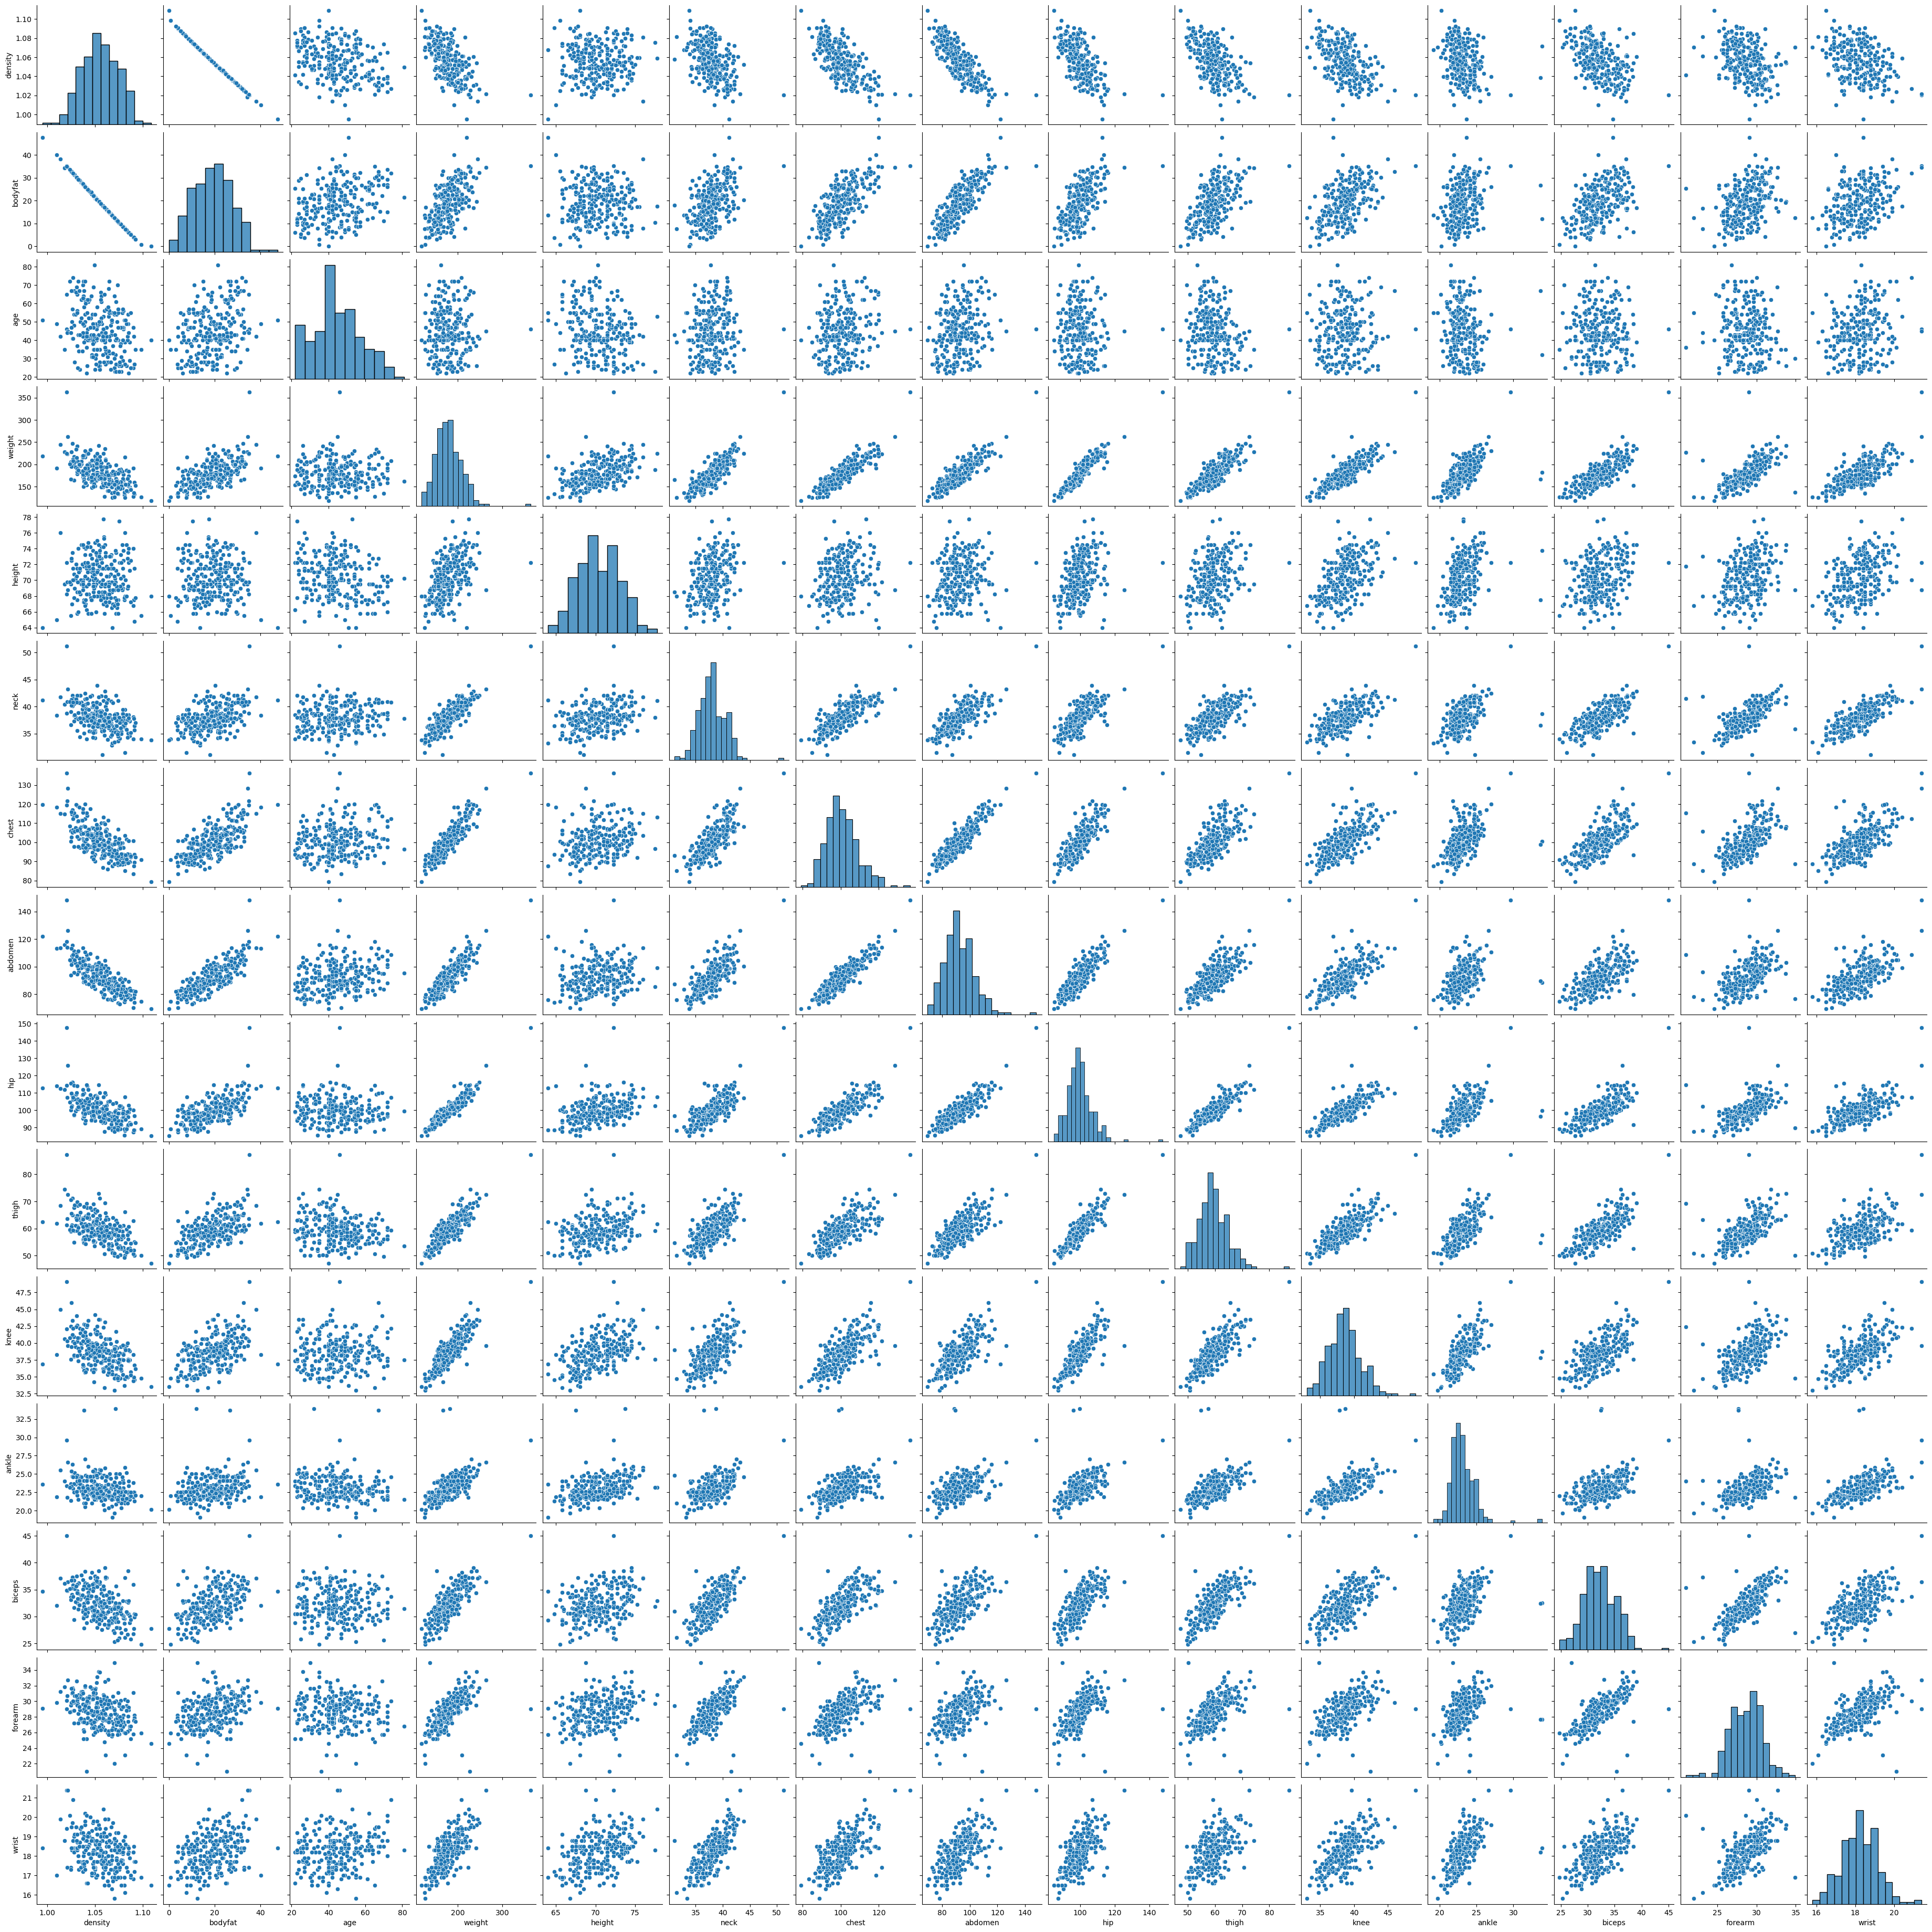

In [104]:
sns.pairplot(bodyfat.to_pandas())

## Pairplus (Trends Between Variables)

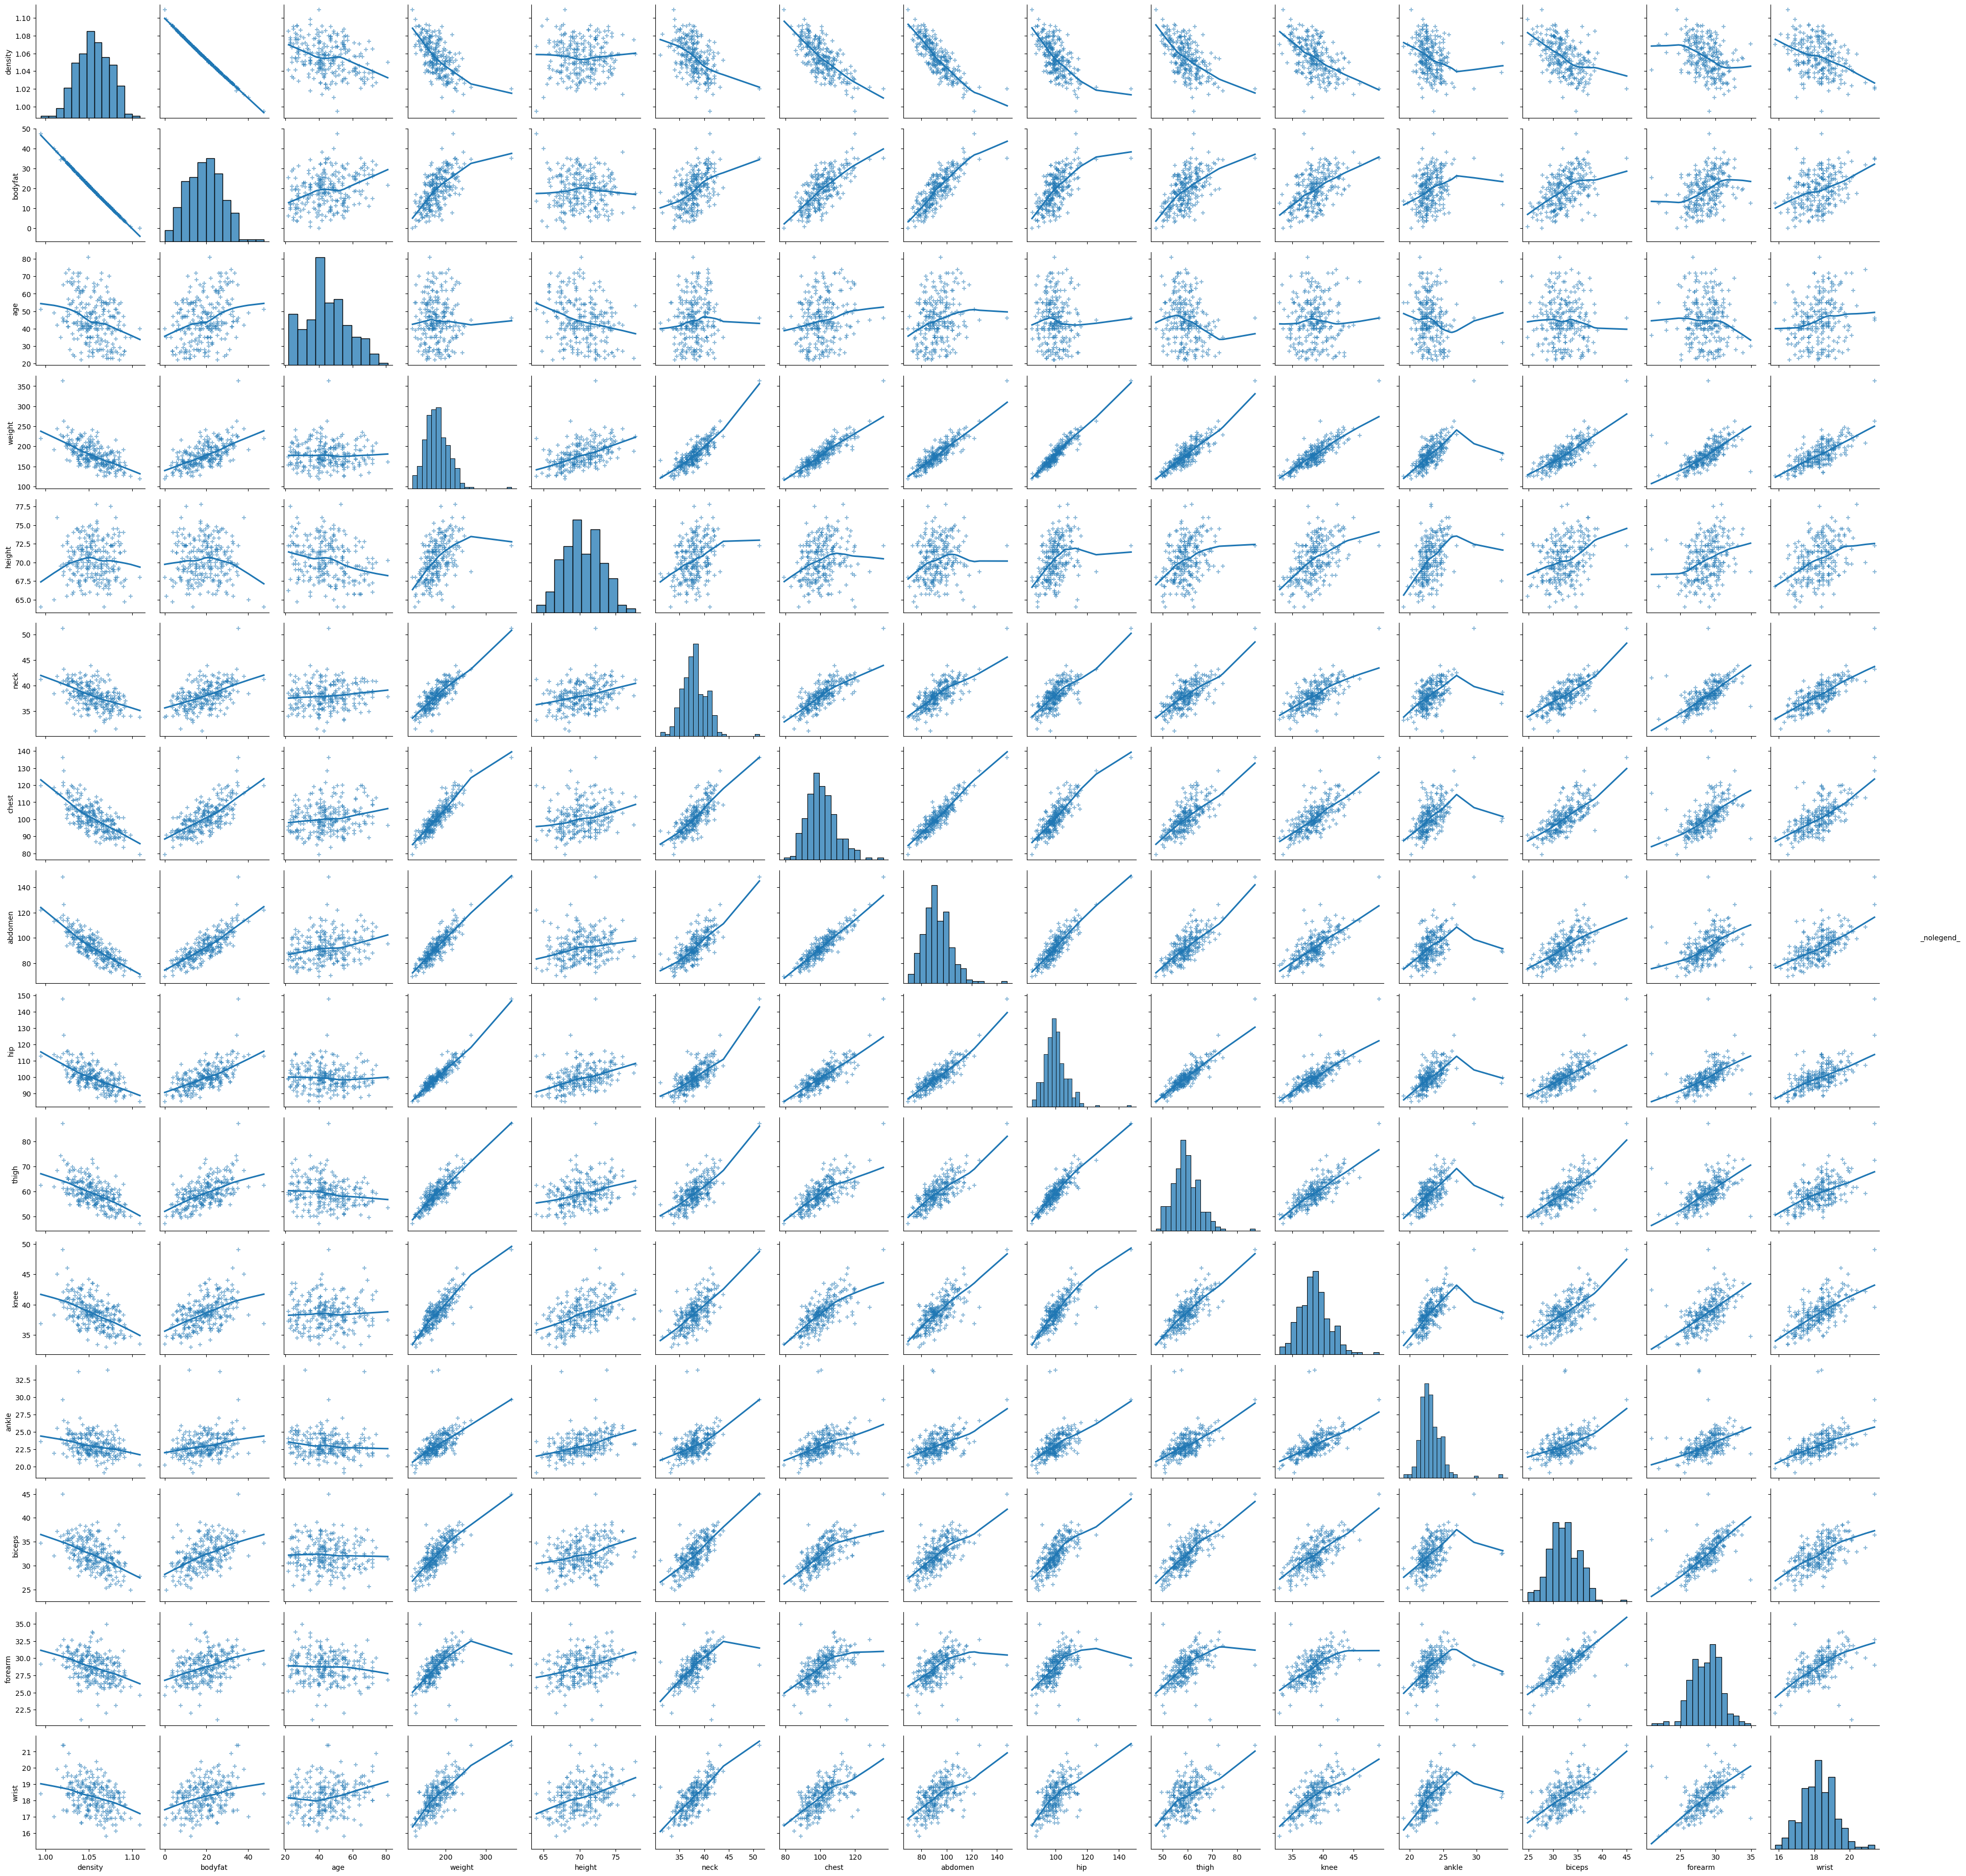

In [102]:
g = sns.PairGrid(bodyfat.to_pandas())
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,
              lowess=True,
              marker="+",
              scatter_kws={'alpha': 0.5}
              )
g.add_legend()


**Summary**

1. Some variables in the histograms are a bit skewed.
2. Most relationships are pretty linear. Bodyfat vs destiny is strongly neative and very linear.
3. The points on the abdomen follows a clear upward trend which is a strong predictor.
4. Bodyfat is kinda spreaded but density is the opposite of bodyfat.
5. Age/ankle/wrist/forearm is the weaker predictors for bodyfat.
6. I see few high and low body fat outliers.